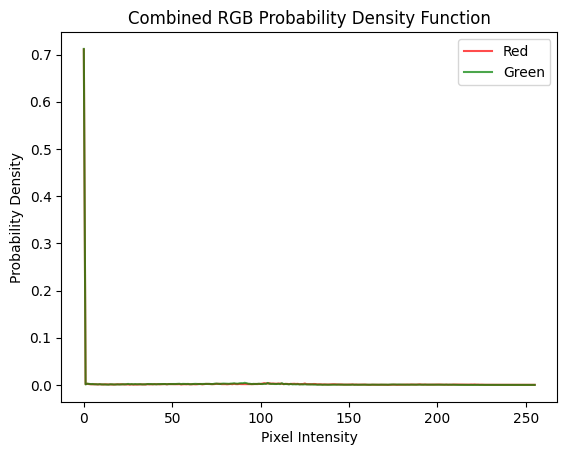

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_combined_rgb_pdf(image_list, path):
    # Create an empty array to accumulate RGB values
    rgb_values = []

    # Iterate through each image in the list
    for image_path in image_list:
        # Load the image
        image = cv2.imread((path+image_path))

        # Convert the image from BGR to RGB
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Flatten the image to get a list of RGB values
        flattened_image = rgb_image.reshape((-1, 3))

        # Append RGB values to the list
        rgb_values.extend(flattened_image)

    # Convert the list of RGB values to a NumPy array
    rgb_values = np.array(rgb_values)

    # Calculate the RGB PDF using a 2D histogram
    r_hist, bins_r = np.histogram(rgb_values[:, 0], bins=256, range=(0, 256), density=True)
    g_hist, bins_g = np.histogram(rgb_values[:, 1], bins=256, range=(0, 256), density=True)
    b_hist, bins_b = np.histogram(rgb_values[:, 2], bins=256, range=(0, 256), density=True)

    return r_hist, g_hist, b_hist, bins_r, bins_g, bins_b

# Example list of image paths and base path
image_paths = ['Original_0.png', 'Original_1.png', 'Original_2.png']
path = "../running_outputs/depth_loss/origin_reconstracted/"

# Compute combined RGB PDF
r_pdf, g_pdf, b_pdf, r_bins, g_bins, b_bins = compute_combined_rgb_pdf(image_paths, path)

# Plot the combined RGB PDFs
plt.plot(r_bins[:-1], r_pdf, color='red', label='Red', alpha=0.7)
plt.plot(g_bins[:-1], g_pdf, color='green', label='Green', alpha=0.7)
plt.plot(b_bins[:-1], b_pdf, color='blue', label='Blue', alpha=0.7)

plt.xlabel('Pixel Intensity')
plt.ylabel('Probability Density')
plt.title('Combined RGB Probability Density Function')
plt.legend()
plt.show()
